In [ ]:
%pip install -U "numpy==1.26.4" "sweetviz==2.3.1" "ydata-profiling==4.10.0" "jinja2==3.1.4"

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
!fusermount -u /content/drive || true
!rm -rf /content/drive
!mkdir -p /content/drive

fusermount: failed to unmount /content/drive: Invalid argument


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import pandas as pd

PKL_PATH = "/content/drive/MyDrive/Spotify_Project/1_Prep/spotify_clean_ready.pkl"

class RenamingUnpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module.startswith("numpy._core"):
            module = module.replace("numpy._core", "numpy.core")
        return super().find_class(module, name)

def load_pickle_compat(path):
    with open(path, "rb") as f:
        return RenamingUnpickler(f).load()

# Load the dataframe safely
df = load_pickle_compat(PKL_PATH)

print("Shape:", df.shape)
display(df.head())

Shape: (32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,i dont care with justin bieber loud luxury remix,ed sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,i dont care with justin bieber loud luxury remix,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,memories dillon francis remix,maroon 5,67,63rPSO264uRjW1X5E6cWv6,memories dillon francis remix,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,all the time don diablo remix,zara larsson,70,1HoSmj2eLcsrR0vE9gThr4,all the time don diablo remix,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,call you mine keanu silva remix,the chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,call you mine the remixes,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,someone you loved future humans remix,lewis capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,someone you loved future humans remix,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [ ]:
print("\nInfo:")
print(df.info())

#Automatic Exploratory Data Analysis (EDA)
An automatic report to get an overview of the dataset - variable types, missing data, distributions, and correlations.


In [ ]:
import os
import numpy as np
import sweetviz as sv

# Ensure the EDA directory exists
EDA_DIR = "/content/drive/MyDrive/Spotify_Project/2_EDA"
os.makedirs(EDA_DIR, exist_ok=True)

# Define report path
REPORT_PATH = os.path.join(EDA_DIR, "spotify_sweetviz.html")

# Define target (if exists)
target = "track_popularity" if "track_popularity" in df.columns else None

# Generate Sweetviz report
sv.analyze([df, "Spotify"], target_feat=target).show_html(REPORT_PATH, open_browser=False)
print("Report saved ->", REPORT_PATH)


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Spotify_Project/2_EDA/spotify_sweetviz.html was generated.
Report saved -> /content/drive/MyDrive/Spotify_Project/2_EDA/spotify_sweetviz.html


In [ ]:
df.dtypes

,0
track_id,object
track_name,string[python]
track_artist,string[python]
track_popularity,int64
track_album_id,object
track_album_name,string[python]
track_album_release_date,object
playlist_name,string[python]
playlist_id,object
playlist_genre,category


# Data Protocol

In [ ]:
import os

# Ensure the EDA directory exists
EDA_DIR = "/content/drive/MyDrive/Spotify_Project/2_EDA"
os.makedirs(EDA_DIR, exist_ok=True)

# Export data type of each column
df.dtypes.to_excel(os.path.join(EDA_DIR, "spotify_datatypes.xlsx"), sheet_name='data_type')

# Export maximum values (numeric columns only)
df.max(numeric_only=True).to_excel(os.path.join(EDA_DIR, "spotify_max.xlsx"), sheet_name='max')

# Export minimum values (numeric columns only)
df.min(numeric_only=True).to_excel(os.path.join(EDA_DIR, "spotify_min.xlsx"), sheet_name='min')

# Export missing values count
df.isnull().sum(axis=0).to_excel(os.path.join(EDA_DIR, "spotify_missing.xlsx"), sheet_name='missing')

# Export number of unique values per column
df.nunique().to_excel(os.path.join(EDA_DIR, "spotify_unique.xlsx"), sheet_name='unique')

print("Summary Excel files saved successfully to your Drive (2_EDA folder).")

Summary Excel files saved successfully to your Drive (2_EDA folder).


# Descriptive Statistics

In [ ]:
import numpy as np

# Generate descriptive statistics only for numeric columns (exclude datetime)
desc_stats = df.describe(include=[np.number]).T

# Sort columns alphabetically (optional)
desc_stats = desc_stats.sort_index()

# Display the summary
desc_stats


,count,mean,std,min,25%,50%,75%,max
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
duration_ms,32833.0,225799.811622,59834.006182,4000.000000,187819.0000,216000.000000,253585.00000,517810.000
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918


In [ ]:
# Convert song duration from milliseconds to seconds and minutes
df['duration_sec'] = df['duration_ms'] / 1000
df['duration_min'] = df['duration_ms'] / 60000

# Check a few values
df[['duration_ms', 'duration_sec', 'duration_min']].head()

,duration_ms,duration_sec,duration_min
0,194754,194.754,3.245900
1,162600,162.600,2.710000
2,176616,176.616,2.943600
3,169093,169.093,2.818217
4,189052,189.052,3.150867


Summary:
During the descriptive analysis, a few potential data issues were identified, specifically tempo = 0, loudness < 0 (invalid value?).
In addition, a new column duration_min and duration_sec was created to represent track length in seconds and minutes for easier interpretation.

# Separate variables by type

In [ ]:
# Continuous (numeric) variables
continuous = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical (object, category, or string) variables
categorical = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

# Binary variables (columns with exactly 2 unique values)
binary = [col for col in df.columns if df[col].nunique(dropna=True) == 2]

# Print summary
print("Number of continuous variables:", len(continuous))
print("Number of categorical variables:", len(categorical))
print("Number of binary variables:", len(binary))

print("\nContinuous variables:\n", continuous)
print("\nCategorical variables:\n", categorical)
print("\nBinary variables:\n", binary)

Number of continuous variables: 15
Number of categorical variables: 10
Number of binary variables: 1

Continuous variables:
 ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'duration_sec', 'duration_min']

Categorical variables:
 ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']

Binary variables:
 ['mode']


# Shape (df_dummy, df_num, df_categorical)

In [ ]:
import numpy as np

# Get dummy (binary) variables
df_dummy = df[[col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]]
print("Binary variables shape:", df_dummy.shape)

# Get all numeric variables
df_num = df.select_dtypes(include=['int64', 'float64'])
print("Numeric variables shape:", df_num.shape)

# Numeric variables excluding binary
df_num_non_dummy = df[df_num.columns.difference(df_dummy.columns)]
print("Numeric (non-binary) variables shape:", df_num_non_dummy.shape)

# Get categorical variables (including 'object' and 'category')
df_categorical = df.select_dtypes(include=['object', 'category'])
print("Categorical variables shape:", df_categorical.shape)

Binary variables shape: (32833, 1)
Numeric variables shape: (32833, 15)
Numeric (non-binary) variables shape: (32833, 14)
Categorical variables shape: (32833, 6)


#Histograms for Continuous Variables

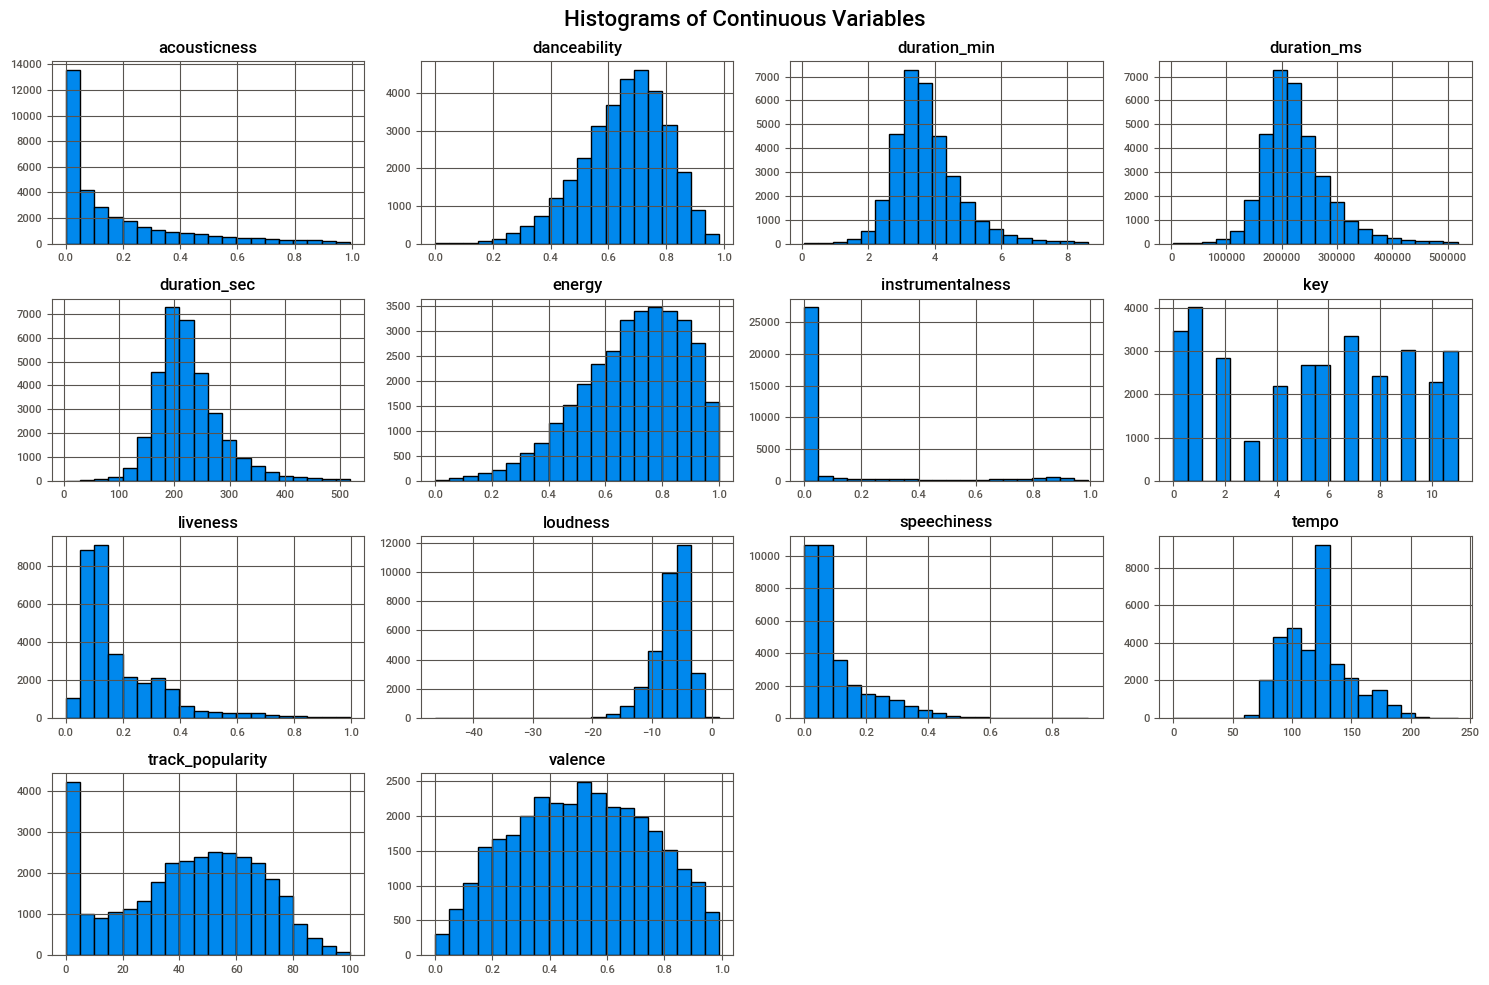

In [ ]:
import matplotlib.pyplot as plt

df_num_non_dummy.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
plt.tight_layout()
plt.show()

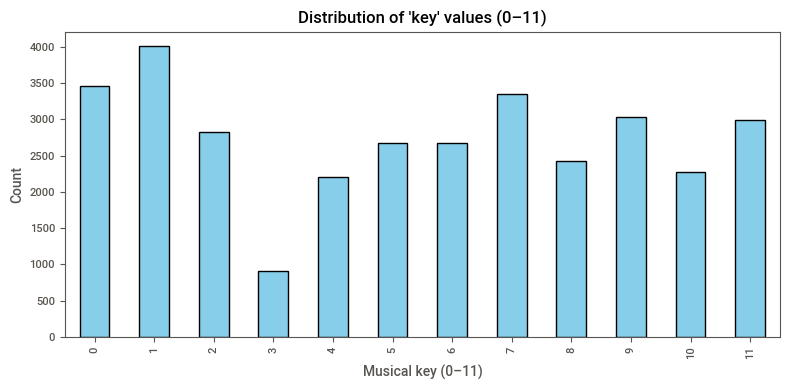

Unique values in 'key': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Number of unique keys: 12


In [ ]:
# Check if 'key' behaves like a categorical variable

plt.figure(figsize=(8,4))
df['key'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of 'key' values (0–11)")
plt.xlabel("Musical key (0–11)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Additional check: how many unique values and what they are
print("Unique values in 'key':", sorted(df['key'].unique()))
print("Number of unique keys:", df['key'].nunique())

In [ ]:
df['track_album_release_date'].isna().sum()

0

# Extraction of release year to analyze the distribution of target value 0 across years

In [ ]:
# --- Extract year, month, and day safely from text date column ---
import pandas as pd
import numpy as np

# Column name
col = 'track_album_release_date'

# Convert to string, clean spaces, drop any time part (e.g., "YYYY-MM-DDT00:00:00")
s = df[col].astype('string').str.strip().str.split('T', n=1, expand=True)[0]

# Extract year / month / day using regex (handles YYYY, YYYY-MM, YYYY-MM-DD)
pattern = r'^(?P<y>\d{4})(?:[./-](?P<m>\d{1,2})(?:[./-](?P<d>\d{1,2}))?)?$'
parts = s.str.extract(pattern)

# Convert to numeric, keeping invalid or missing as NaN
y = pd.to_numeric(parts['y'], errors='coerce')
m = pd.to_numeric(parts['m'], errors='coerce')
d = pd.to_numeric(parts['d'], errors='coerce')

# Assign results back to DataFrame (nullable Int64 so NaN is preserved)
df['release_year']  = y.astype('Int64')
df['release_month'] = m.astype('Int64')
df['release_day']   = d.astype('Int64')

# Create full datetime only when all three parts exist
mask_full = y.notna() & m.notna() & d.notna()
dt = pd.Series(pd.NaT, index=df.index)
dt.loc[mask_full] = pd.to_datetime(
    {
        'year':  y.loc[mask_full].astype(int),
        'month': m.loc[mask_full].astype(int),
        'day':   d.loc[mask_full].astype(int)
    },
    errors='coerce'
)

# Extract day-of-week only where full date exists
df['release_dow'] = dt.dt.dayofweek  # 0=Mon, 6=Sun, NaN if date incomplete

# Quick check of missing counts
print(df[['release_year', 'release_month', 'release_day', 'release_dow']].isna().sum())
df[['track_album_release_date','release_year','release_month','release_day']].head(10)

release_year        0
release_month    1855
release_day      1886
release_dow      1886
dtype: int64


,track_album_release_date,release_year,release_month,release_day
0,2019-06-14,2019,6,14
1,2019-12-13,2019,12,13
2,2019-07-05,2019,7,5
3,2019-07-19,2019,7,19
4,2019-03-05,2019,3,5
5,2019-07-11,2019,7,11
6,2019-07-26,2019,7,26
7,2019-08-29,2019,8,29
8,2019-06-14,2019,6,14
9,2019-06-20,2019,6,20


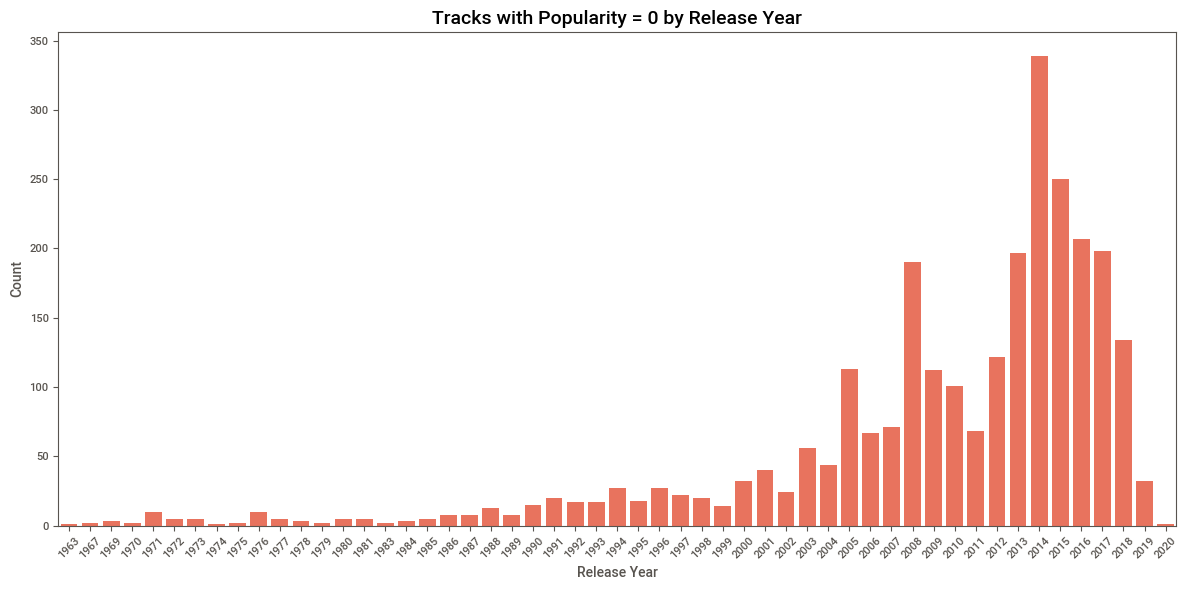

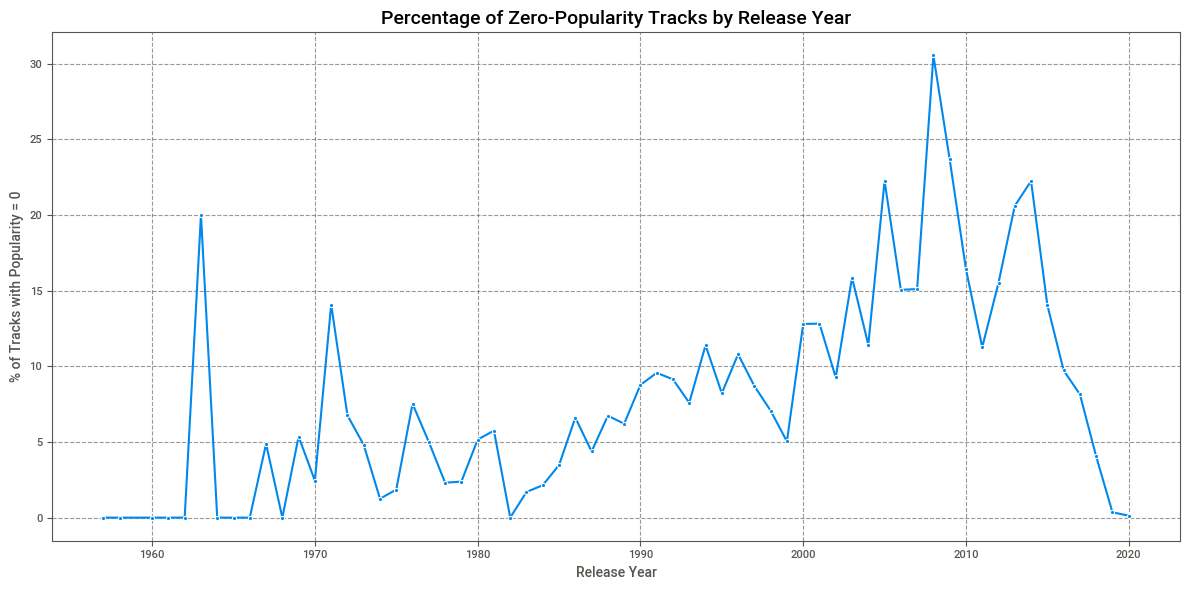

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter zero-popularity tracks
zero_pop = df[df['track_popularity'] == 0]

# Plot count of zero-popularity tracks by year
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=zero_pop, color='tomato')
plt.title("Tracks with Popularity = 0 by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot share (%) of zero-popularity tracks by year
share_by_year = (
    df.groupby('release_year')['track_popularity']
      .apply(lambda x: (x == 0).mean() * 100)
      .reset_index(name='zero_pop_share')
)

plt.figure(figsize=(12,6))
sns.lineplot(data=share_by_year, x='release_year', y='zero_pop_share', marker='o')
plt.title("Percentage of Zero-Popularity Tracks by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("% of Tracks with Popularity = 0")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Count total number of tracks released each year
tracks_per_year = (
    df.groupby('release_year')['track_popularity']
      .count()
      .reset_index(name='total_tracks')
)

display(tracks_per_year.head())

,release_year,total_tracks
0,1957,2
1,1958,1
2,1960,4
3,1961,1
4,1962,2


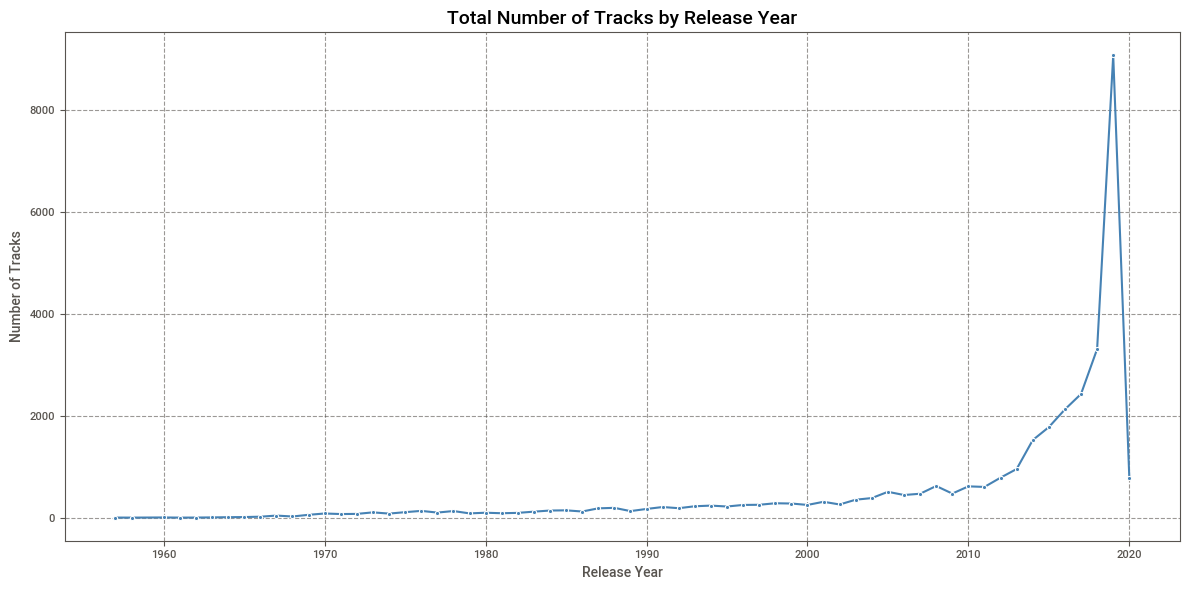

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=tracks_per_year, x='release_year', y='total_tracks', marker='o', color='steelblue')
plt.title("Total Number of Tracks by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

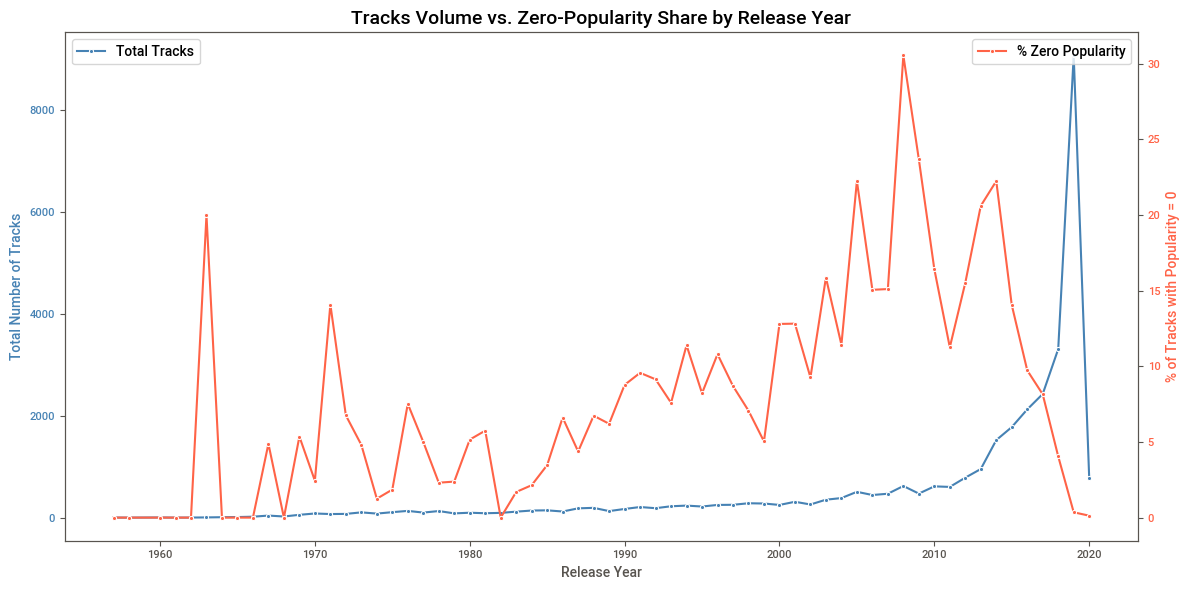

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate total number of tracks per year
tracks_per_year = (
    df.groupby('release_year')['track_popularity']
      .count()
      .reset_index(name='total_tracks')
)

# Calculate % of zero-popularity tracks per year
zero_pop_share = (
    df.groupby('release_year')['track_popularity']
      .apply(lambda x: (x == 0).mean() * 100)
      .reset_index(name='zero_pop_share')
)

# Merge both DataFrames
trend = pd.merge(tracks_per_year, zero_pop_share, on='release_year', how='inner')

# Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(12,6))

# Left axis — total tracks
sns.lineplot(data=trend, x='release_year', y='total_tracks', color='steelblue', marker='o', label='Total Tracks', ax=ax1)
ax1.set_xlabel("Release Year")
ax1.set_ylabel("Total Number of Tracks", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Right axis — % zero popularity
ax2 = ax1.twinx()
sns.lineplot(data=trend, x='release_year', y='zero_pop_share', color='tomato', marker='o', label='% Zero Popularity', ax=ax2)
ax2.set_ylabel("% of Tracks with Popularity = 0", color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title("Tracks Volume vs. Zero-Popularity Share by Release Year", fontsize=14)
fig.tight_layout()
plt.show()


The rise in zero-popularity tracks around 2008 and again around 2014 is not due to a sudden increase in total releases.

In [ ]:
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')
df['release_dow'] = df['release_dow'].astype('category')

In [ ]:
df['release_month'] = df['release_month'].astype('Int64')
df['release_day'] = df['release_day'].astype('Int64')

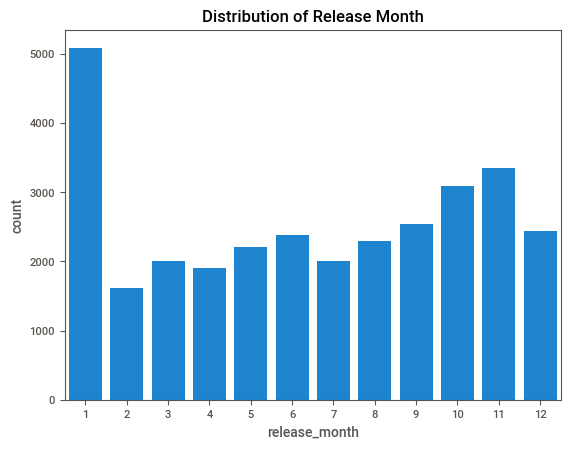

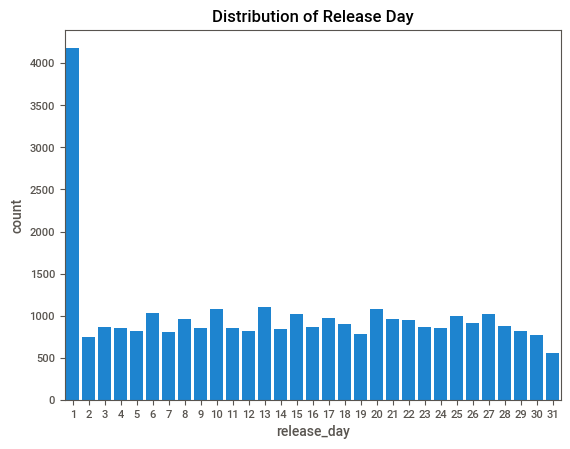

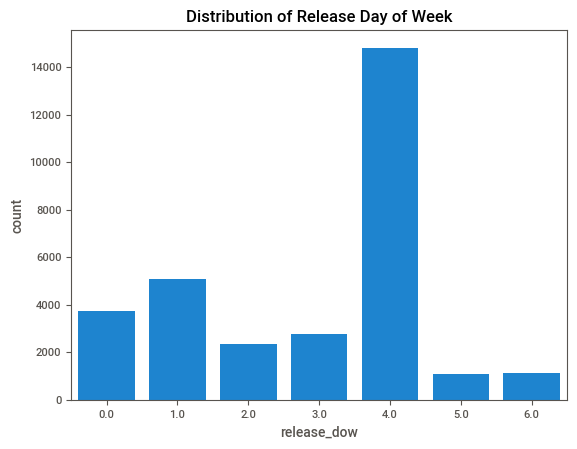

In [ ]:
# Distribution of release month
sns.countplot(x='release_month', data=df)
plt.title("Distribution of Release Month")
plt.show()

# Distribution of release day
sns.countplot(x='release_day', data=df)
plt.title("Distribution of Release Day")
plt.show()

# Distribution of release day-of-week
sns.countplot(x='release_dow', data=df)
plt.title("Distribution of Release Day of Week")
plt.show()

Most songs were released in January and on the first day of the month, with a strong concentration around Fridays (day-of-week = 4)

In [ ]:
# Identify binary (dummy) columns: contain only 0/1 values
df_dummy = df[[col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]]

# Identify all numeric columns (integers and floats)
df_num = df.select_dtypes(include=['int64', 'float64', 'Int64'])

# Keep only numeric non-binary columns
df_num_non_dummy = df[df_num.columns.difference(df_dummy.columns)]

# Identify categorical columns
df_categorical = df.select_dtypes(include=['object', 'category'])

print("Binary variables:", df_dummy.columns.tolist())
print("Numeric (non-binary) variables:", df_num_non_dummy.columns.tolist())
print("Categorical variables:", df_categorical.columns.tolist())

Binary variables: ['mode']
Numeric (non-binary) variables: ['acousticness', 'danceability', 'duration_min', 'duration_ms', 'duration_sec', 'energy', 'instrumentalness', 'liveness', 'loudness', 'release_day', 'release_month', 'release_year', 'speechiness', 'tempo', 'track_popularity', 'valence']
Categorical variables: ['track_id', 'track_album_id', 'track_album_release_date', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'key', 'mode', 'release_dow']


In [ ]:
# Drop IDs from categorical
id_cols = ['track_id', 'track_album_id', 'playlist_id']
df_categorical = df_categorical.drop(columns=id_cols, errors='ignore')

# Remove duplicate column 'mode' from categorical set
if 'mode' in df_categorical.columns:
    df_categorical = df_categorical.drop(columns='mode')

print("Cleaned categorical variables:", df_categorical.columns.tolist())

Cleaned categorical variables: ['track_album_release_date', 'playlist_genre', 'playlist_subgenre', 'key', 'release_dow']


In [ ]:
# Recreate the subsets after type conversion
df_dummy = df[[col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]]
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num_non_dummy = df[df_num.columns.difference(df_dummy.columns)]
df_categorical = df.select_dtypes(include=['object', 'category'])

print("Updated numeric (non-binary) variables:", df_num_non_dummy.columns.tolist())

Updated numeric (non-binary) variables: ['acousticness', 'danceability', 'duration_min', 'duration_ms', 'duration_sec', 'energy', 'instrumentalness', 'liveness', 'loudness', 'release_day', 'release_month', 'release_year', 'speechiness', 'tempo', 'track_popularity', 'valence']


# Skewness of Continuous Variables

In [ ]:
# Calculate skewness for all continuous (non-binary) variables
skew_values = df_num_non_dummy.skew(numeric_only=True)

# Sort by absolute skewness (most skewed first)
skew_sorted = skew_values.reindex(skew_values.abs().sort_values(ascending=False).index)

# Rename the output Series name for clarity
skew_sorted.name = "Skewness"

# Display the results
print("Skewness values (sorted by magnitude):\n")
display(skew_sorted.to_frame())

Skewness values (sorted by magnitude):



,Skewness
instrumentalness,2.759472
liveness,2.07672
speechiness,1.967029
release_year,-1.873715
acousticness,1.594786
loudness,-1.364097
duration_sec,1.149863
duration_min,1.149863
duration_ms,1.149863
energy,-0.63633


Variables such as energy, tempo, and danceability show mild skewness, while valence, track popularity, release_month, and release_day are nearly symmetric.
However, release_month and release_day are not true continuous variables; therefore, their skewness values are not analytically meaningful.

# Bar plots for binary (dummy) variables

/tmp/ipython-input-2937587909.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_dummy[i], palette=["aqua", "blueviolet"])


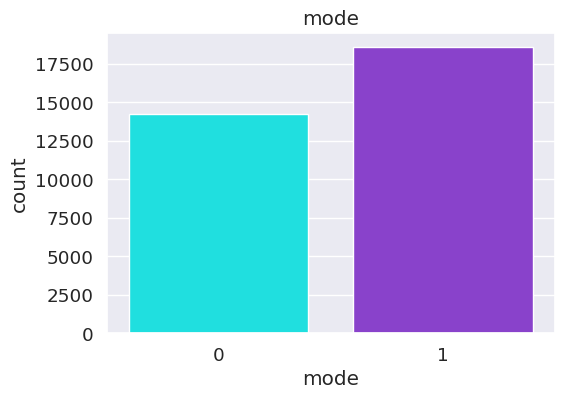

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = 4   # number of rows
b = 4   # number of columns
c = 1   # plot counter

fig = plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.6)
sns.set(font_scale=1.2)

for i in df_dummy.columns:
    plt.subplot(a, b, c)
    plt.title(i)
    sns.countplot(x=df_dummy[i], palette=["aqua", "blueviolet"])
    c += 1

fig.tight_layout()
plt.show()

# Distribution of Categorical Variables

In [ ]:
id_like_cols = [
    'track_id', 'track_name', 'track_artist',
    'track_album_id', 'track_album_name',
    'playlist_id', 'playlist_name'
]

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Build categorical DataFrame without IDs or high-cardinality columns
df_categorical = df.select_dtypes(include=['object', 'category']).drop(columns=id_like_cols, errors='ignore')

print("Categorical variables shape:", df_categorical.shape)
display(df_categorical.head())

Categorical variables shape: (32833, 6)


,track_album_release_date,playlist_genre,playlist_subgenre,key,mode,release_dow
0,2019-06-14,pop,dance pop,6,1,4.0
1,2019-12-13,pop,dance pop,11,1,4.0
2,2019-07-05,pop,dance pop,1,0,4.0
3,2019-07-19,pop,dance pop,7,1,4.0
4,2019-03-05,pop,dance pop,1,1,1.0


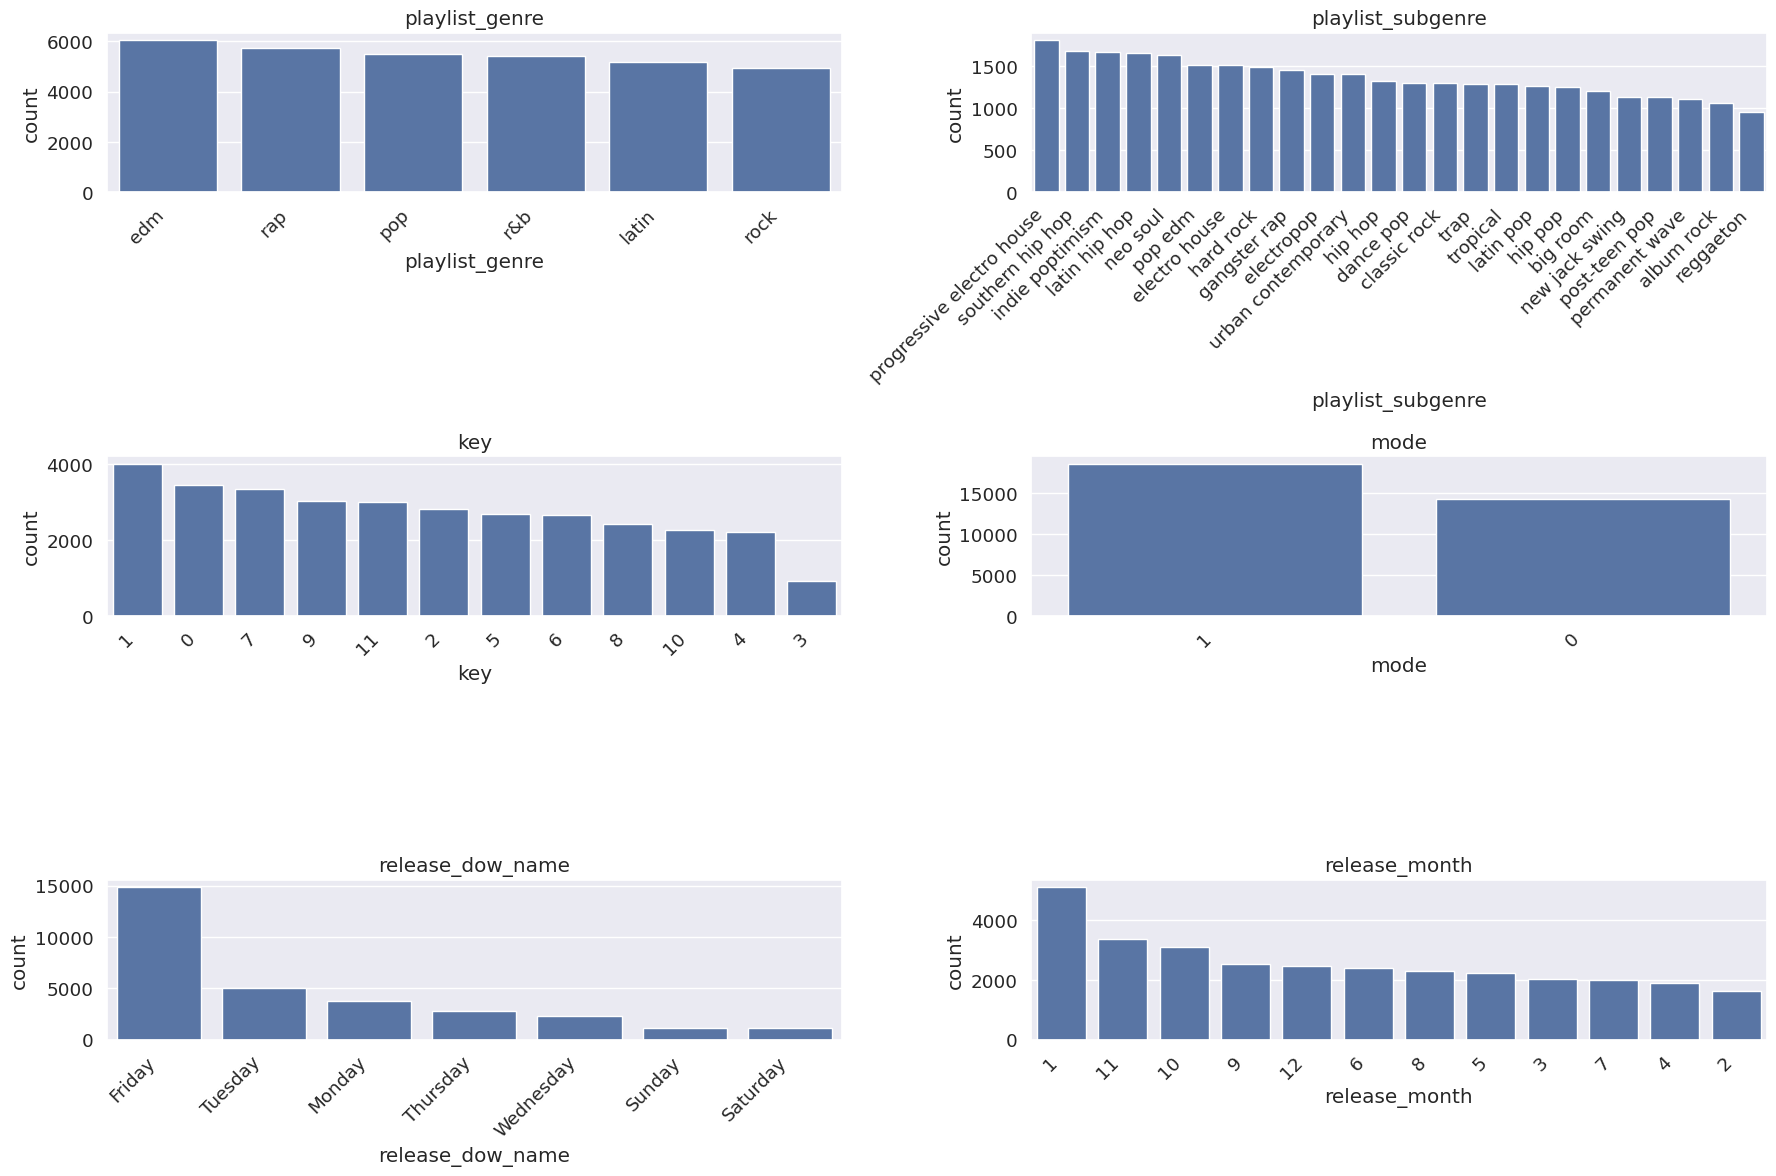

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dow_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['release_dow_name'] = df['release_dow'].map(dow_map)

categorical_cols = [
    'playlist_genre', 'playlist_subgenre',
    'key', 'mode',
    'release_dow_name', 'release_month'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The majority of tracks are released on Fridays and mainly during January.

In [ ]:
df.select_dtypes(include=['object', 'string']).nunique().sort_values(ascending=False)

,0
track_id,28356
track_name,22973
track_album_id,22545
track_album_name,19432
track_artist,10675
track_album_release_date,4530
playlist_id,471
playlist_name,423


# Correlation matrix for numerical variables

track_popularity  track_popularity    1.000000
energy            loudness            0.656131
danceability      valence             0.330741
                  speechiness         0.260503
release_month     release_day         0.232960
                                        ...   
speechiness       instrumentalness   -0.199441
acousticness      instrumentalness   -0.213523
loudness          acousticness       -0.283909
duration_ms       release_year       -0.451338
energy            acousticness       -0.491177
Length: 92, dtype: float64

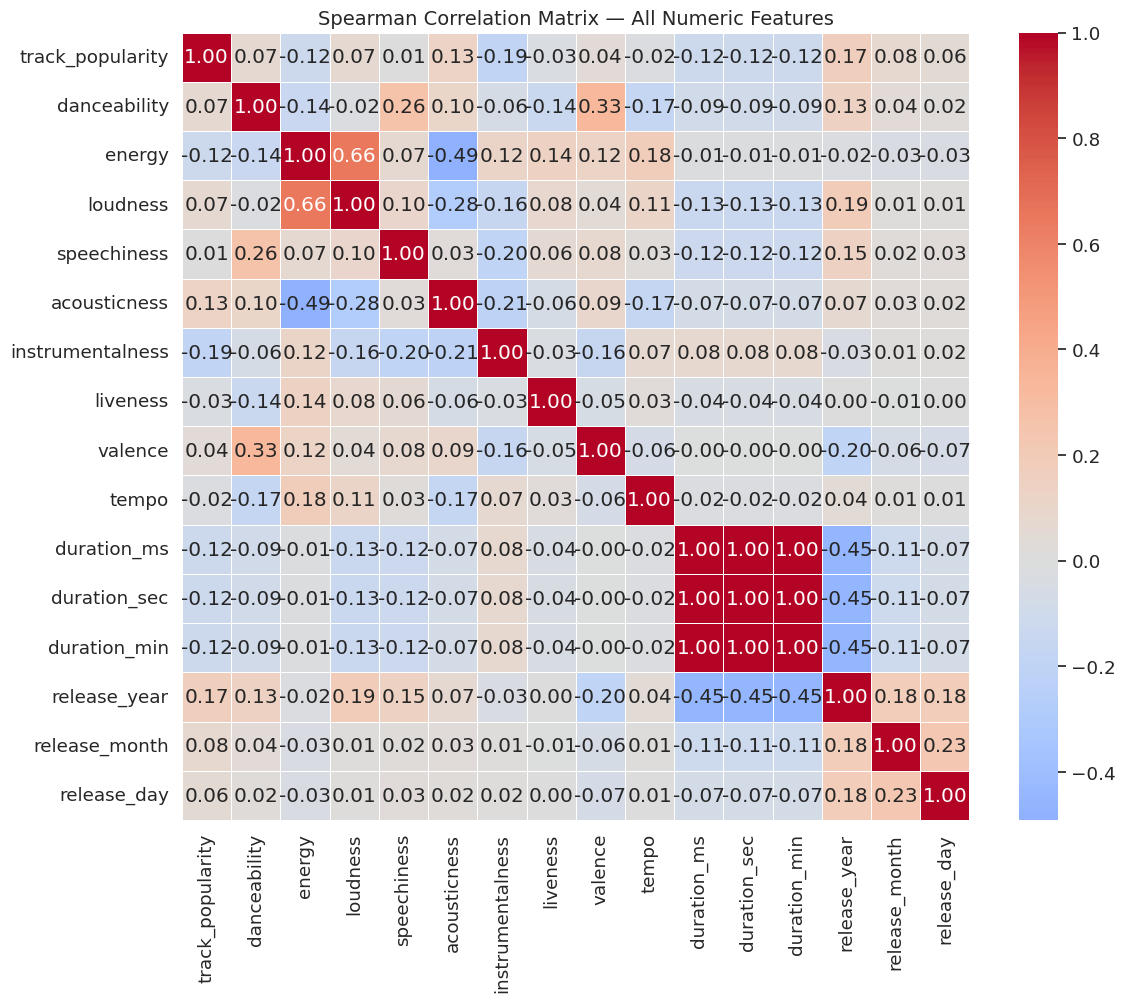

In [ ]:
# Spearman correlation matrix (handles non-normal data)
corr_s = df.corr(method='spearman', numeric_only=True)

# Display as sorted correlation pairs (optional, to inspect strongest relationships)
corr_pairs = (
    corr_s.unstack()
    .drop_duplicates()
    .sort_values(ascending=False)
)
display(corr_pairs)

# Full heatmap of all numeric correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_s,
    cmap='coolwarm',
    center=0,
    annot=True,        # shows the numbers
    fmt=".2f",         # round to 2 decimals
    square=True,
    linewidths=.5
)
plt.title('Spearman Correlation Matrix — All Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

# Correlation summary:
The Spearman correlation matrix shows that most numeric features are only weakly correlated with track_popularity.
A moderate positive correlation appears between energy and loudness (ρ = 0.66), reflecting the natural link between energetic and loud tracks.
Danceability and valence are moderately correlated (ρ = 0.33), suggesting that happier tracks tend to be more danceable.
A strong negative correlation is observed between energy and acousticness (ρ = -0.49), as highly acoustic songs are usually less energetic.
The duration features (in minutes, seconds, and milliseconds) are perfectly correlated (ρ = 1.0) and represent the same information - only one should be retained.
Track_popularity has generally low correlations: slightly positive for release_year (newer tracks are somewhat more popular) and slightly negative for instrumentalness (instrumental tracks tend to be less popular), indicating that song popularity is not strongly explained by any single numeric feature.
Overall, no severe multicollinearity is observed except among the duration measure.


# Mann–Whitney Test (a non-parametric alternative to T-test, which does not assume normal distribution of popularity) for Binary Variables vs Track Popularity.


In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd

# 1) Identify binary variables
binary_cols = [col for col in df.columns if df[col].nunique(dropna=True) == 2]

results = []

# 2) Run Mann–Whitney U test for each binary variable
for col in binary_cols:
    levels = [x for x in df[col].dropna().unique()]
    if len(levels) != 2:
        continue
    levels = sorted(levels)
    a, b = levels[0], levels[1]

    group1 = df.loc[df[col] == a, 'track_popularity'].dropna()
    group2 = df.loc[df[col] == b, 'track_popularity'].dropna()

    # Run test only if both groups have enough data
    if len(group1) > 1 and len(group2) > 1:
        u_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided', method='auto')

        n1, n2 = len(group1), len(group2)
        r_rb = 1 - (2 * u_stat) / (n1 * n2)
        # Median difference between the groups
        med_diff = float(np.median(group2) - np.median(group1))

        results.append({
            'Variable': col,
            'Group1': str(a),
            'Group2': str(b),
            'U-statistic': round(u_stat, 2),
            'p-value': p_val,
            'Rank-biserial_r': r_rb,
            'Median_diff(G2-G1)': med_diff,
            'Group1_mean_pop': round(group1.mean(), 2),
            'Group2_mean_pop': round(group2.mean(), 2),
            'Group1_n': n1,
            'Group2_n': n2
        })
    else:
        print(f"Skipped {col} — not enough data in one of the groups.")

# 3) Convert to DataFrame and format
mann_df = pd.DataFrame(results).sort_values('p-value')
mann_df['p-value'] = mann_df['p-value'].round(6)
mann_df['Rank-biserial_r'] = mann_df['Rank-biserial_r'].round(4)

# 4) Display results
display(mann_df)

# 5) Interpretation message
print("Mann–Whitney U test completed.")
print("Variables with p-value < 0.05 show statistically significant differences in track popularity.")

,Variable,Group1,Group2,U-statistic,p-value,Rank-biserial_r,Median_diff(G2-G1),Group1_mean_pop,Group2_mean_pop,Group1_n,Group2_n
0,mode,0,1,130479401.5,0.022351,0.0147,1.0,42.17,42.71,14259,18574


Mann–Whitney U test completed.
Variables with p-value < 0.05 show statistically significant differences in track popularity.


/tmp/ipython-input-1571957840.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


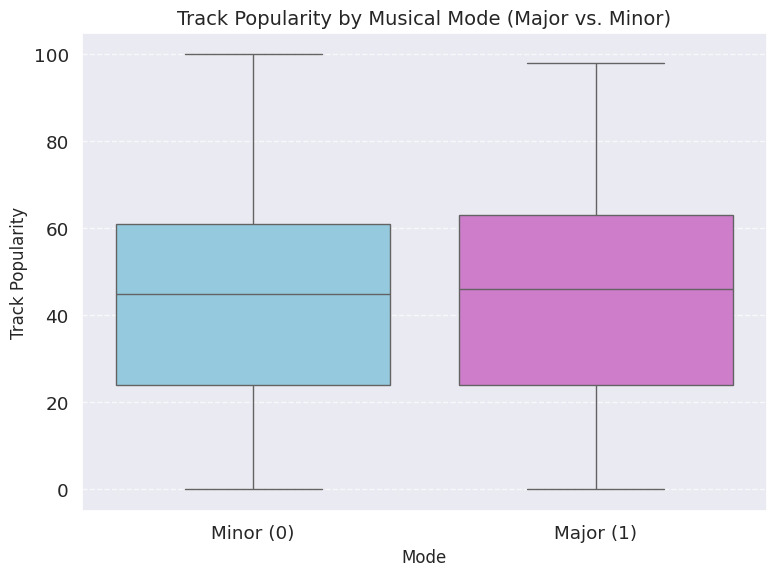

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['mode_label'] = df['mode'].map({0: 'Minor (0)', 1: 'Major (1)'})

plt.figure(figsize=(8,6))
sns.boxplot(
    x='mode_label',
    y='track_popularity',
    data=df,
    palette=["skyblue", "orchid"]
)

plt.title("Track Popularity by Musical Mode (Major vs. Minor)", fontsize=14)
plt.xlabel("Mode", fontsize=12)
plt.ylabel("Track Popularity", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Kruskal-Wallis for All Main Categorical Variables

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


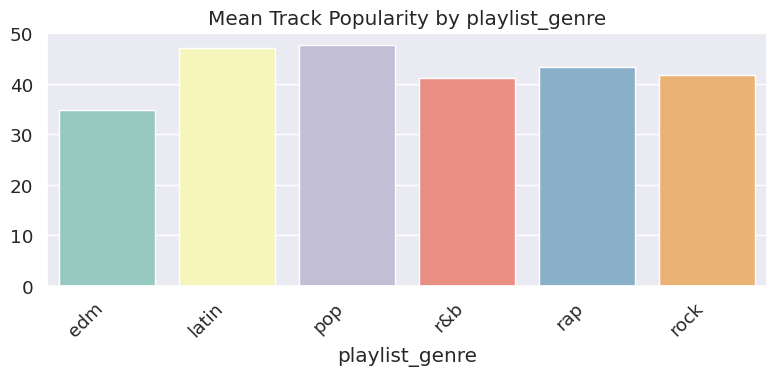

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


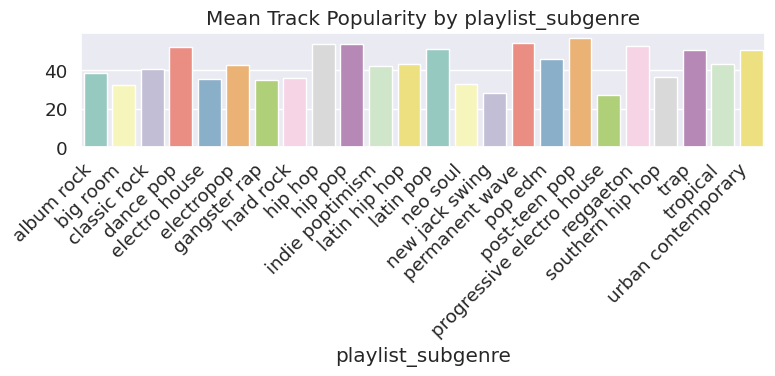

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


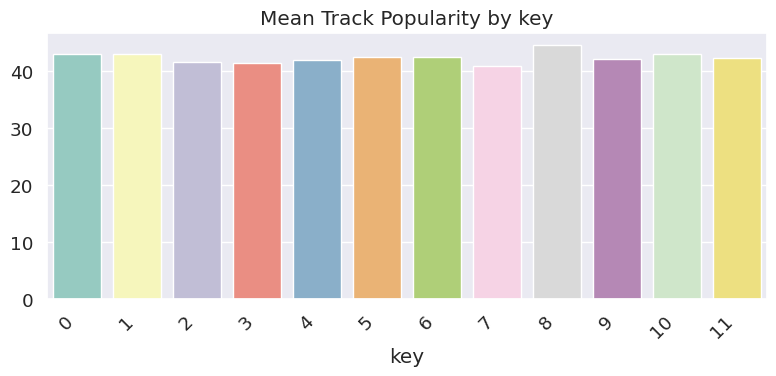

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


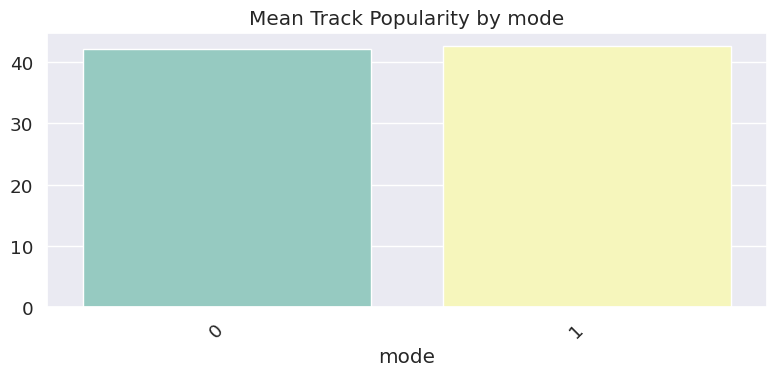

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


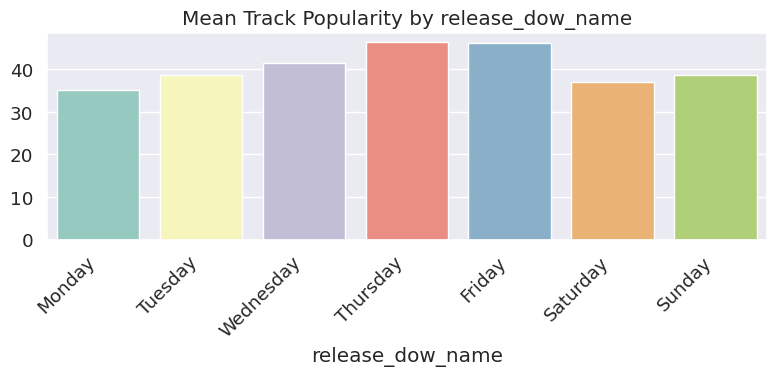

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


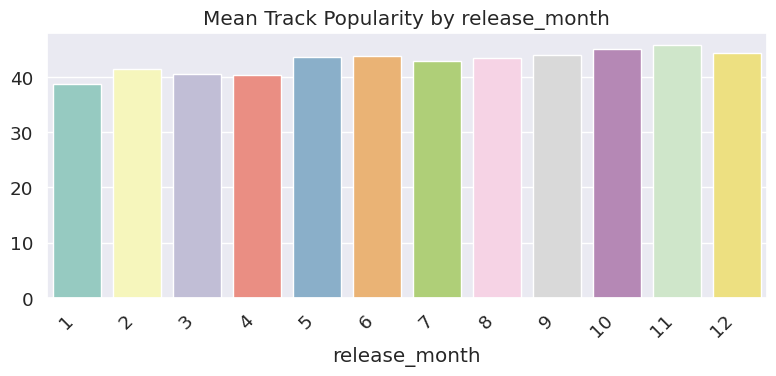

/tmp/ipython-input-1336029934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')


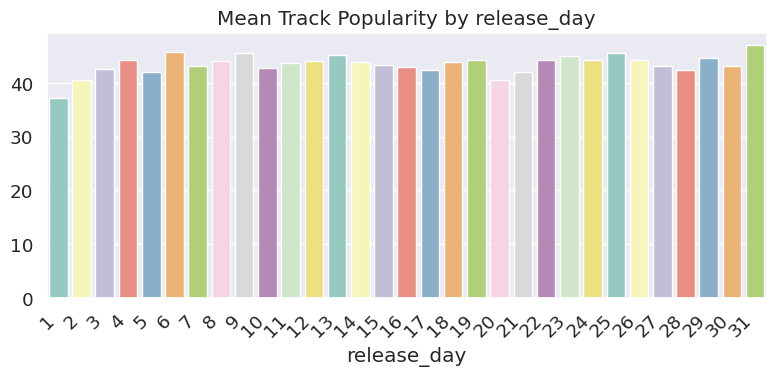

,Variable,Levene_p,ANOVA_p,Kruskal_p
1,playlist_subgenre,1.455850e-288,0.000000e+00,0.000000e+00
0,playlist_genre,6.920180e-46,2.702657e-218,5.486340e-242
4,release_dow_name,1.972993e-35,6.563223e-201,1.140477e-175
5,release_month,2.931395e-09,9.946260e-51,1.525552e-42
6,release_day,6.244027e-19,1.085280e-51,2.141324e-42
2,key,5.884158e-02,1.988223e-05,3.460539e-06
3,mode,7.668236e-01,5.394028e-02,2.235051e-02


In [ ]:
from scipy.stats import f_oneway, kruskal, levene
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['playlist_genre', 'playlist_subgenre', 'key', 'mode',
            'release_dow_name', 'release_month', 'release_day']

results = []

for col in [c for c in cat_vars if c in df.columns]:
    groups = [g['track_popularity'].dropna() for _, g in df.groupby(col, observed=False)]
    if len(groups) < 2:
        continue

    lev_p = levene(*groups, center='median').pvalue
    f_p = f_oneway(*groups).pvalue
    k_p = kruskal(*groups).pvalue

    results.append({'Variable': col, 'Levene_p': lev_p, 'ANOVA_p': f_p, 'Kruskal_p': k_p})

    plt.figure(figsize=(8, 4))
    group_means = df.groupby(col, observed=False)['track_popularity'].mean()
    sns.barplot(x=group_means.index, y=group_means.values, palette='Set3')
    plt.title(f"Mean Track Popularity by {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

anova_summary = pd.DataFrame(results).sort_values('Kruskal_p')
display(anova_summary)

All categorical variables show statistically significant differences in mean popularity, though the strength of the effect varies.
The most impactful features are subgenre, genre, and release day of week, while key and mode show smaller but still significant effects.

# Chi-Square Test for Categorical Variables

In [ ]:
from scipy.stats import chi2_contingency, fisher_exact
import pandas as pd, numpy as np, itertools

cat_vars = [c for c in [
    'playlist_genre','playlist_subgenre','mode','key',
    'release_dow_name','release_month','release_day'
] if c in df.columns]

MIN_COUNT = 20  # filter very rare levels to avoid zero expected cells
rows = []

for a, b in itertools.combinations(cat_vars, 2):
    # keep only reasonably frequent levels in each variable
    va = df[a].value_counts(dropna=False)
    vb = df[b].value_counts(dropna=False)
    mask = df[a].isin(va[va >= MIN_COUNT].index) & df[b].isin(vb[vb >= MIN_COUNT].index)
    if mask.sum() < 2:
        continue

    ct = pd.crosstab(df.loc[mask, a], df.loc[mask, b], dropna=False)

    # drop zero-marginal rows/cols
    ct = ct.loc[ct.sum(1) > 0, ct.sum(0) > 0]
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        continue

    if ct.shape == (2, 2):
        _, p = fisher_exact(ct.values)
        test = "Fisher exact"
        v, dof = "", 1
    else:
        chi2, p, dof, expected = chi2_contingency(ct, correction=False)
        # compute Cramér's V
        n = ct.values.sum()
        r, k = ct.shape
        v = np.sqrt(chi2 / (n * (min(r-1, k-1))))
        # optional: flag sparse tables
        sparse = (expected < 5).mean()  # fraction of cells < 5
        if sparse > 0.2:
            test += " (sparse)"

    rows.append({
        "Pair": f"{a} × {b}",
        "Test": "Fisher exact" if ct.shape == (2,2) else "Chi-square",
        "p_value": p,
        "Cramers_V": "" if ct.shape == (2,2) else round(float(v), 4),
        "df": 1 if ct.shape == (2,2) else dof
    })

chi_df = pd.DataFrame(rows).sort_values("p_value")
display(chi_df)

,Pair,Test,p_value,Cramers_V,df
0,playlist_genre × playlist_subgenre,Chi-square,0.000000e+00,1.0000,115
18,release_dow_name × release_month,Chi-square,0.000000e+00,0.1027,77
11,mode × key,Chi-square,0.000000e+00,0.3047,11
19,release_dow_name × release_day,Chi-square,0.000000e+00,0.1382,180
8,playlist_subgenre × release_dow_name,Chi-square,0.000000e+00,0.1551,138
10,playlist_subgenre × release_day,Chi-square,0.000000e+00,0.0682,690
3,playlist_genre × release_dow_name,Chi-square,0.000000e+00,0.1225,30
20,release_month × release_day,Chi-square,0.000000e+00,0.2439,330
9,playlist_subgenre × release_month,Chi-square,2.620339e-279,0.0777,253
7,playlist_subgenre × key,Chi-square,5.269916e-166,0.0633,253


All associations were statistically significant, likely due to the large sample size.

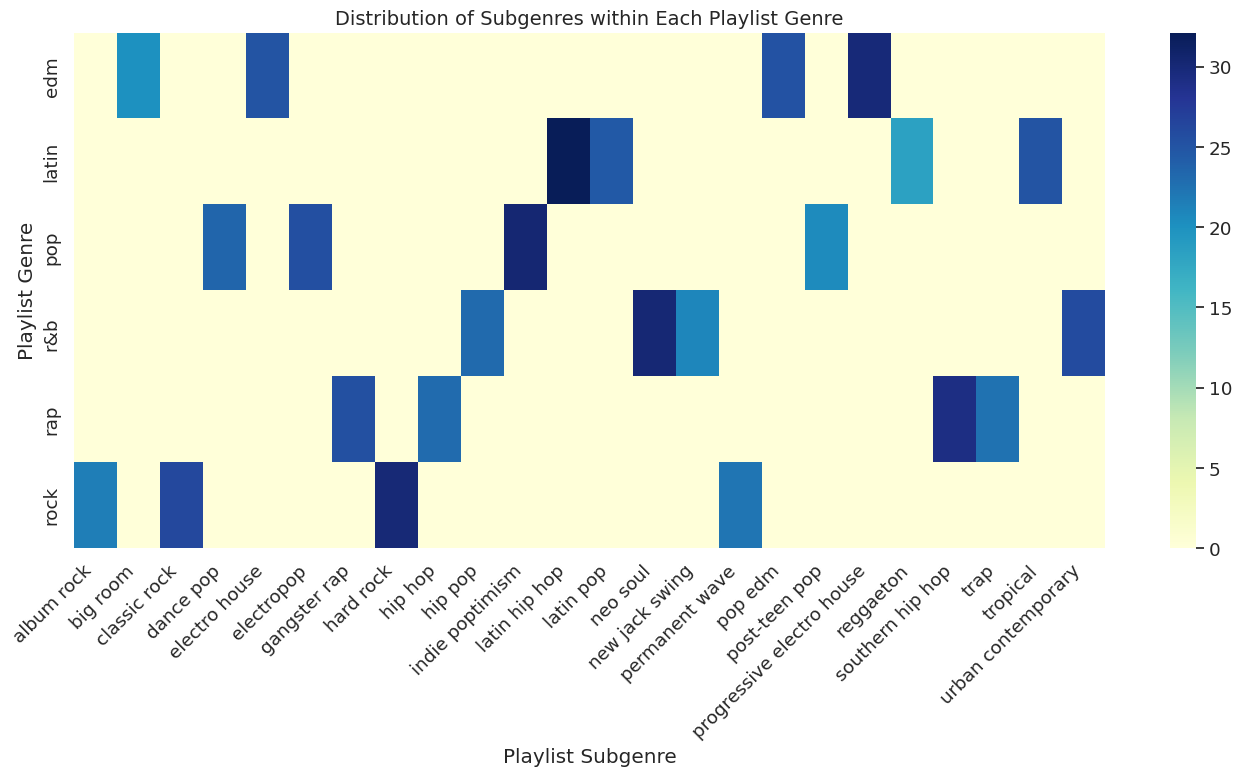

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crosstab: genre × subgenre
cross1 = pd.crosstab(df['playlist_genre'], df['playlist_subgenre'], normalize='index') * 100

plt.figure(figsize=(14, 8))
sns.heatmap(cross1, annot=False, cmap="YlGnBu", cbar=True)
plt.title("Distribution of Subgenres within Each Playlist Genre", fontsize=14)
plt.xlabel("Playlist Subgenre")
plt.ylabel("Playlist Genre")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

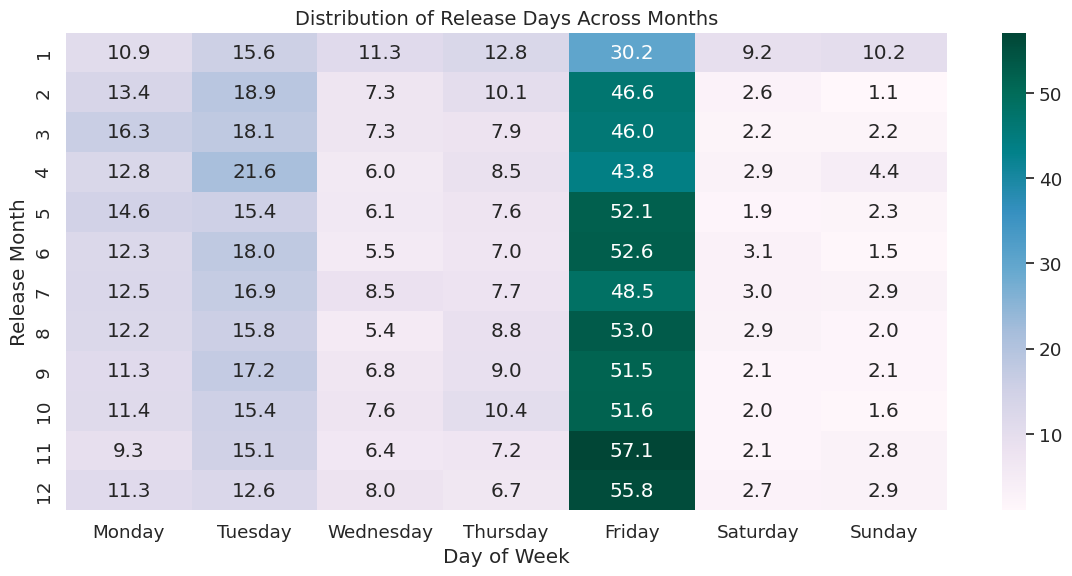

In [ ]:
cross2 = pd.crosstab(
    df['release_month'],
    df['release_dow_name'],
    normalize='index'
) * 100

plt.figure(figsize=(12,6))
sns.heatmap(cross2, cmap="PuBuGn", cbar=True, annot=True, fmt=".1f")
plt.title("Distribution of Release Days Across Months", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Release Month")
plt.tight_layout()
plt.show()

The heatmaps visualize the categorical associations identified in the Chi-square analysis.
Subgenres are almost perfectly nested within their parent genres, confirming a structural dependency between the two.
Most songs are released on Fridays across all months.

In [ ]:
import pickle

EDA_PATH = "/content/drive/MyDrive/Spotify_Project/2_EDA/spotify_EDA_full.pkl"

with open(EDA_PATH, "wb") as f:
    pickle.dump(df, f)

print("EDA dataframe saved successfully!")
print("Shape:", df.shape)

EDA dataframe saved successfully!
Shape: (32833, 31)
